# **Non Linear Models**


## **Concepts Covered:**

- [Importing Libraries](#importing-libraries)
- [Data Overview](#data-overview)
- [Data Preparation for Model Building](#(2)-data-preparation-for-model-building)
- [**Model Building**](#**model-building**)
- [**Decision Trees**](#**decision-trees**)
- [**Bagging Regressor**](#**bagging-regressor**)
- [**Random Forest Regressor**](#**random-forest-regressor**)
- [**AdaBoost**](#**adaboost**)
- [**Gradient Boosting Regressor**](#**gradient-boosting-regressor**)
- [**XGBoost Regressor**](#**xgboost-regressor**)
- [**Models' Performance Comparison**](#**models'-performance-comparison**)
- [**Choosing the Models for Tuning Hyperparameters**](#**choosing-the-models-for-tuning-hyperparameters**)
- [**Tuning the Model**](#**tuning-the-model**)
- [**Tuned Random Forest Regressor**](#**tuned-random-forest-regressor**)
- [**Choosing the Final Model**](#**choosing-the-final-model**)
- [**Visualizing the Feature Importance**](#**visualizing-the-feature-importance**)
- [**Business Insights and Recommendations**](#**business-insights-and-recommendations**)
- [**Next Steps**](#**next-steps**)

<a id="importing-libraries"></a>
## 🔹 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

Loading the data:

In [2]:
#data = pd.read_csv('https://raw.githubusercontent.com/hizocar/USM-COURSE/main/docs/datasets/healthcare_data.csv')
data = pd.read_csv('/Users/fernandodiaz/Library/CloudStorage/OneDrive-UniversidadTécnicaFedericoSantaMaría/Machine Learning Supervisado/Data/healthcare_data.csv')

In [3]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

<a id="data-overview"></a>
## 🔹 Data Overview

Let's briefly look our data set.

In [4]:
# View the first 5 rows of the dataset
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [5]:
# Understand the shape of the data
data.shape

(500000, 15)

- The dataset has **5,00,000 rows and 15 columns.**

In [6]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

As before, we can drop **patientid** from the data as it is an identifier and will not add value to the analysis. Also, there are no duplicates in the data.

In [7]:
# Dropping patientid from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["patientid"])

In [8]:
# Checking for duplicate values in the data
data.duplicated().sum()

np.int64(0)

---
<a id="2-data-preparation-for-model-building"></a>
# 📚 Data Preparation for Model Building



- Before we proceed to build a model, we'll have to encode categorical features.
- Separate the independent variables and dependent Variables.
- We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [9]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [10]:
# Check the data after handling categorical data
data

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,4,2,2,3554.835677,9,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
2,2,8,2,5624.733654,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
3,4,7,4,4814.149231,8,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,2,10,2,5169.269637,34,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
499996,13,8,2,4631.550257,11,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
499997,2,3,2,5456.930075,8,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
499998,2,1,2,4694.127772,23,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [11]:
# Separating independent variables and the target variable
x = data.drop('Stay (in days)',axis=1)

y = data['Stay (in days)']

In [12]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [13]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 41)
Shape of test set :  (100000, 41)


<a id="model-building"></a>
## 🔹 **Model Building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression model evaluation. We will define a function to calculate these metrics.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percentage error for all data points. The absolute percentage error is defined as the predicted value minus actual value divided by actual value. It works best if there are no extreme values in the data and none of the actual values are 0.

In [14]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<a id="decision-trees"></a>
# 🔹 **Decision Trees**

**What is a Decision Tree?**

Decision Trees are a type of supervised machine learning algorithm that can be used for **both classification and regression tasks**. They are often used in business and industry to make decisions based on data, and are particularly useful for tasks that require decision-making based on a set of conditions.

**How does a Decision Tree work?**

A Decision Tree works by recursively splitting the dataset into smaller subsets based on the feature that provides the most information gain at each step. This process continues until the subsets are as pure as possible, meaning that they contain as few mixed class labels as possible, or until a stopping criterion is met (e.g., when a maximum depth is reached).


### 🔹 **Impurity Measures in Classification Tress Trees**

$$\large Information\ Gain = Entropy\ before\ split - Entropy\ after\ split$$

where, $$\large Entropy = -\sum_{i=1}^{c} p_i \log_2 p_i$$

Here, $p$ is the proportion of positive instances in the subset.

The goal of the algorithm is to find the tree that provides the best predictions on the training data, while also being as simple and interpretable as possible.

### 🔹 **Impurity Measures in Regression Trees**

In **classification trees**, impurity is measured using **entropy** or **Gini index**, which quantify how mixed the class labels are within a node.  

For **regression trees**, however, we deal with **continuous target values**, so we need a different way to measure impurity — typically **variance** or **mean squared error (MSE)**.

---

#### 📏 **Impurity for Regression Trees**

The impurity of a node in a regression tree is computed as:

$$
\text{Impurity (Regression)} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \bar{y})^2
$$

where:

- $N$ = number of observations in the node  
- $y_i$ = actual target value for observation $i$  
- $\bar{y}$ = mean of all target values in the node  

---

#### 💡 **Interpretation**

- This measure represents the **average squared deviation** of the target values within the node.  
- A node with **low variance** means the target values are close together → the node is **pure**.  
- A node with **high variance** means the target values are spread out → the node is **impure**.

When the tree algorithm splits a node, it seeks to **reduce the overall variance** (or MSE) — analogous to how **entropy** is reduced in classification trees.

---

#### ⚙️ **Connection to the Plot**

In your decision tree visualization, the term **`squared_error`** (or sometimes `variance`) represents exactly this impurity measure — it plays the same conceptual role as **entropy** in classification trees, quantifying how "mixed" or "dispersed" the target values are within each node.


In [15]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(x_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.821321,1.13127,0.947324,0.947302,9.353216


**Let's visualize the decision tree and examine the tree's decision rules. Visualizing a Decision Tree can help you understand how the algorithm works and interpret its predictions. Visualizing the tree can help us to:**

- **Identify the root node:** The first node at the top of the tree is called the root node. It represents the entire dataset and is used to split the data into two or more homogeneous subsets.

- **Identify the internal nodes:** The nodes that are not leaf nodes are called internal nodes. They represent a decision or a test on a feature and are used to split the data into smaller subsets based on the feature value.

- **Identify the leaf nodes:** The nodes at the bottom of the tree are called leaf nodes. They represent the output or the class label of the data after going through all the splits in the tree.

- **Follow a path from the root to a leaf node:** To interpret a decision tree, you can follow a path from the root node to a leaf node. Along the path, you can see the tests performed on the features, and based on the test results, the data is split into smaller subsets.

- **Analyze the feature importance:** You can analyze the feature importance by looking at the splits in the tree. The features used to split the data at the top of the tree are the most important features, as they have the highest impact on the decision.

- **Analyze the class distribution:** You can analyze the class distribution at the leaf nodes to understand how the decision tree predicts the class labels. If the majority of the samples in a leaf node belong to a particular class, the decision tree predicts that class for the new data.

- **Explain the decision:** Finally, you can explain the decision made by the decision tree by summarizing the path taken from the root to the leaf node and the class label predicted at the leaf node. You can also explain the importance of the features used in the decision and how they influence the final prediction.


We will limit the decision tree's depth to two so that we can visualize it better.

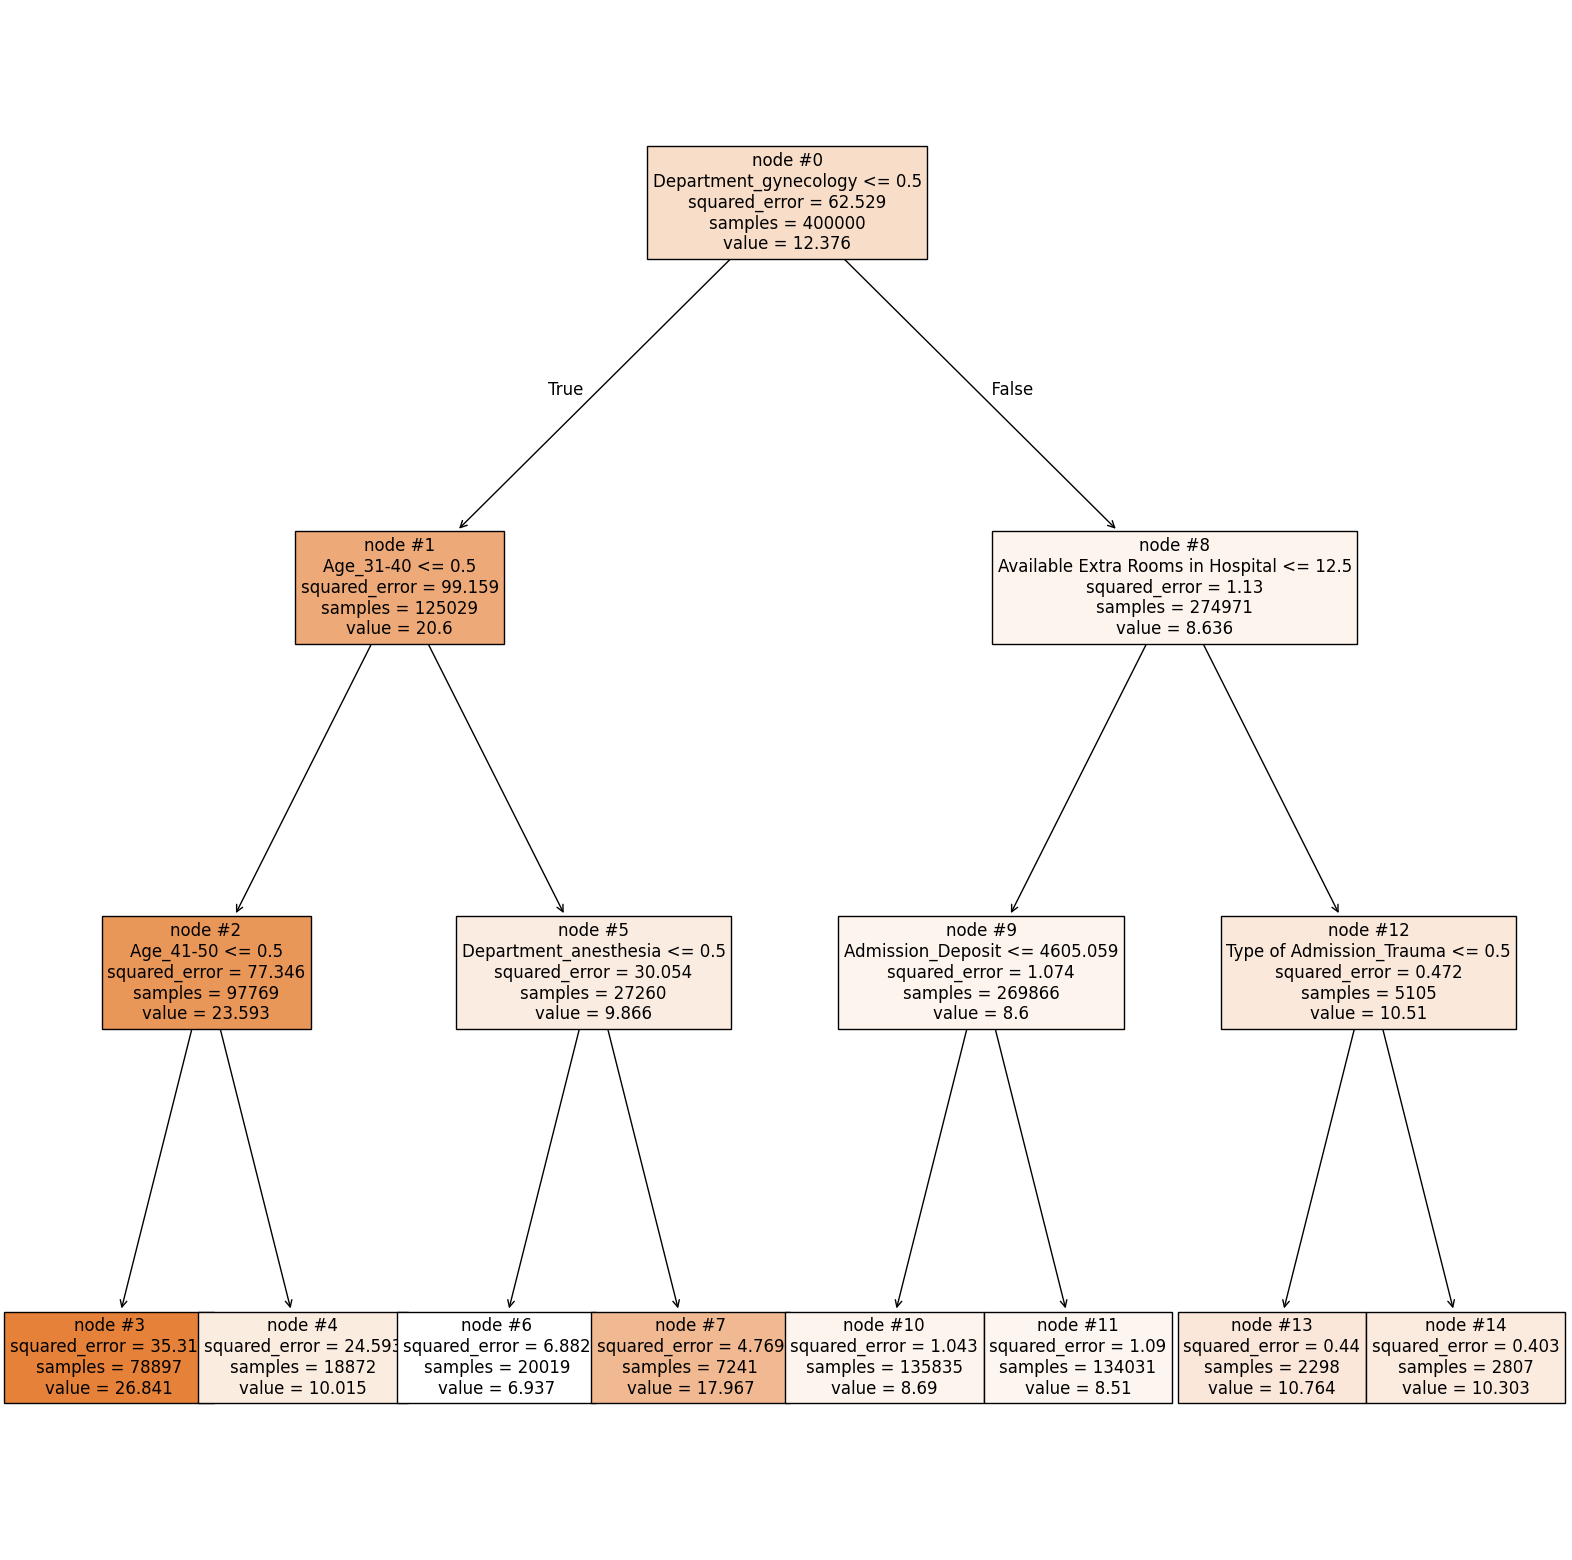

In [16]:
from sklearn import tree
features = list(x.columns)

# Building the model with max_depth=3
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth=3)

# Fitting the model
dt_regressor_visualize.fit(x_train, y_train)


plt.figure(figsize = (20, 20))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = True)
plt.show()

In [17]:
print(tree.export_text(dt_regressor_visualize, feature_names=x_train.columns.tolist(), show_weights=True))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.02]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.94]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.97]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.76]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



**Observations:**

- **Root Node:** Department_gynecology <= 0.5. This is the starting point of the decision tree, which means that the Gynecology department results in the highest information gain among all the features. If the value is less than or equal to 0.5,  the left branch is taken, and if it is greater than 0.5, the right branch is taken.

- **Internal Nodes:**
    - Age_31-40 <= 0.5
    - Age_41-50 <= 0.5
    - Department_anesthesia <= 0.5
    - Available Extra Rooms in Hospital <= 12.5
    - Admission_Deposit <= 4605.06
    - Type of Admission_Trauma <= 0.5
    
These are the intermediate nodes of the tree. Each node represents a decision based on a particular feature and a threshold value. Depending on the value of the feature, the tree follows the appropriate branch until it reaches a leaf node.

- **Leaf nodes** are the nodes in the tree that do not have any child nodes. In this tree, the leaf nodes correspond to the final decision of the tree. For example, the first leaf node in the tree is reached when the value of "Department_gynecology" is less than or equal to 0.5, "Age_31-40" is less than or equal to 0.5, and "Age_41-50" is less than or equal to 0.5.

**Interpretation and Conclusions:**

- The decision tree starts with a split on the Department_gynecology feature. If the patient was not admitted to the gynecology department, the tree proceeds to consider the patient's age and the department of anesthesia.
    - If the patient is between 31-40 years old and was not admitted to the department of anesthesia, the tree reaches a leaf node and the predicted LOS for the patient is ~7 days.
    - If the patient is not admitted to the department of gynecology and is not between 31-50 years old, then the predicted LOS for the patient is ~27 days.
- If the patient was admitted to the gynecology department, the tree proceeds to consider the number of available extra rooms in the hospital and the type of admission.
    - If the patient was admitted with trauma and the number of available extra rooms is greater than 12.5, the tree reaches a leaf node and the predicted LOS for the patient is ~11 days.
    - If the number of available extra rooms is less than or equal to 12.5 and admission deposit is less than or equal to 4605.06, the tree reaches a leaf node and the predicted LOS for the patient is ~9 days.

**Note:** The tree is truncated and not shown completely to get proper visualization. You can try to plot the complete tree and get some more observations.

<a id="bagging-regressor"></a>
## 🔹 **Bagging Regressor**

**What is a Bagging Regressor?**

Bagging (short for Bootstrap Aggregating) is an ensemble learning technique that involves training multiple models on different subsets of the training data and then combining their predictions. The idea is to reduce variance and overfitting by averaging the predictions of many models.

A Bagging Regressor is a type of Bagging algorithm used for regression tasks. It involves training multiple regression models (e.g., Decision Trees) on different subsets of the training data and then combining their predictions by taking the average.

**How does a Bagging Regressor work?**

The Bagging Regressor works by generating multiple subsets of the training data by randomly selecting data points with replacement (i.e., allowing the same data point to be selected more than once in the same subset). Each subset is used to train a separate regression model, and the predictions of these models are combined by taking their average.

The idea behind this approach is that by training multiple models on different subsets of the data, we can reduce the variance and overfitting of the final model, while still maintaining the same bias as a single model trained on the entire dataset.

$$\large Prediction = average\ of\ predictions\ of\ individual\ decision\ tree\ regressors$$

In [18]:
# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1)

# Fitting the model
bagging_estimator.fit(x_train, y_train)

# Model Performance on the test data
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)

bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.364505,0.902326,0.970434,0.970422,7.627444


We are implicitly doing this:

In [19]:
bagging_estimator = BaggingRegressor(
    n_estimators=10,         # default number of bootstrap models
    bootstrap=True,          # sampling with replacement
    max_samples=1.0,         # each model sees 100% of training samples (with replacement)
    max_features=1.0,        # each model uses all features
    random_state=1
)


<a id="random-forest-regressor"></a>
# 🔹 **Random Forest Regressor**

**What is a Random Forest?**

Random Forest is another ensemble learning technique that combines multiple Decision Trees to create a more robust and accurate model. Like Bagging, it involves training multiple models on different subsets of the training data, but with an additional twist: at each split in the tree, only a random subset of the available features is considered for splitting.

This helps to reduce the correlation between the trees in the forest and improves their overall accuracy.

**How does a Random Forest work?**

A Random Forest works by training multiple Decision Trees on different subsets of the training data, and then combining their predictions by taking their average. The key difference from Bagging is that at each split in the tree, only a random subset of the features is considered for splitting.

The algorithm works as follows:

1. Generate multiple random subsets of the training data (with replacement).
2. For each subset, train a Decision Tree on a random subset of the features.
3. Make predictions for new data by averaging the predictions of all the trees in the forest.

The number of trees in the forest and the number of features considered at each split are hyperparameters that can be tuned to optimize the performance of the model.

The Random Forest algorithm doesn't have any specific equations, but it involves training multiple Decision Trees on different subsets of the training data with a random subset of the features considered at each split.

In [20]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(x_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, x_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.302336,0.863677,0.973067,0.973056,7.306138


| Parameter           | Default Value       | Description                                                                                                                           |
| ------------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| `n_estimators`      | **100**             | Number of decision trees (estimators) in the forest.                                                                                  |
| `criterion`         | **'squared_error'** | The function used to measure the quality of a split. For regression, this is the Mean Squared Error (MSE).                            |
| `max_depth`         | **None**            | Trees grow until all leaves are pure or contain fewer than `min_samples_split` samples.                                               |
| `min_samples_split` | **2**               | Minimum number of samples required to split an internal node.                                                                         |
| `min_samples_leaf`  | **1**               | Minimum number of samples required to be at a leaf node.                                                                              |
| `max_features`      | **'sqrt'**          | Number of features to consider when looking for the best split. For regression, `'sqrt'` means use the square root of total features. |
| `bootstrap`         | **True**            | Each tree is trained on a bootstrap sample (sampling with replacement).                                                               |
| `oob_score`         | **False**           | Out-of-bag samples are not used for validation unless set to True.                                                                    |
| `n_jobs`            | **None**            | Number of CPU cores used for parallel computation. `None` = 1 core. Use `-1` for all cores.                                           |
| `random_state`      | **None**            | Random seed for reproducibility.                                                                                                      |
| `max_samples`       | **None**            | If bootstrap is True, this sets the number (or fraction) of samples to draw per tree. If None → uses all samples.                     |


### ⚖️ **Bias–Variance Trade-Off in Random Forests (Regression)**

In regression, the **bias–variance trade-off** describes how model complexity affects predictive performance:

- **Bias** refers to error introduced by approximating a real-world problem (which may be very complex) by a simplified model.  
- **Variance** refers to error introduced by sensitivity to fluctuations in the training data (overfitting).

Mathematically, the expected prediction error at a new point $( x_0 )$ can be decomposed as:

$$
\mathbb{E}\big[(Y - \hat{f}(x_0))^2\big] = 
\underbrace{\big(\text{Bias}[\hat{f}(x_0)]\big)^2}_{\text{Systematic error}} + 
\underbrace{\text{Var}[\hat{f}(x_0)]}_{\text{Model variability}} + 
\underbrace{\sigma^2}_{\text{Irreducible error}}
$$

---

### 🌲 **How Random Forests Achieve the Balance**

A **single decision tree** is a **high-variance, low-bias** estimator:  
it fits the training data closely (low bias) but can change drastically with small data perturbations (high variance).

A **Random Forest** addresses this by combining many decorrelated trees trained on different **bootstrap samples** and random **feature subsets**. The key idea is that averaging many independent, high-variance estimators reduces overall variance:

$$
\text{Var}\bigg(\frac{1}{B}\sum_{b=1}^B \hat{f}_b(x)\bigg)
= \frac{1}{B^2}\sum_{b=1}^B \text{Var}[\hat{f}_b(x)]
+ \frac{2}{B^2}\sum_{b<c} \text{Cov}[\hat{f}_b(x), \hat{f}_c(x)]
$$

As the number of trees $( B )$ increases:
- The first term $( \frac{1}{B}\text{Var}[\hat{f}_b(x)])$ **shrinks**, reducing overall variance.
- The second term depends on the **correlation** between trees.  
  Random feature selection lowers this correlation, further reducing variance.

---

### 🧠 **In summary**

> Random Forests maintain the **low bias** of deep decision trees  
> while substantially reducing **variance** through averaging decorrelated trees.

This ensemble approach results in a model that is both **accurate** and **robust**, making Random Forests one of the most powerful non-parametric methods for regression.


<a id="adaboost"></a>
## 🔹 **AdaBoost**

**What is Adaboost?**

Adaboost (short for Adaptive Boosting) is a type of boosting algorithm that combines multiple weak classifiers to create a stronger classifier. A weak classifier is a classifier that performs only slightly better than random guessing.

**How does Adaboost work?**

Adaboost works by training multiple weak classifiers on different subsets of the training data, and then combining their predictions to make a final prediction. The algorithm works as follows:

Assign equal weights to all the training examples.
Train a weak classifier on a subset of the training data.
Increase the weights of the misclassified examples.
Train another weak classifier on the same subset of data but with the weights adjusted to give more importance to the misclassified examples.
Repeat steps 3-4 for a specified number of iterations or until the error rate is sufficiently low.
Combine the predictions of all the weak classifiers to make a final prediction.
The key idea behind Adaboost is that by giving more weight to the misclassified examples, the algorithm can focus on the examples that are more difficult to classify and improve its overall accuracy.



### ⚙️ **AdaBoost for Classification**
The Adaboost algorithm involves computing the weighted error rate of each weak classifier and using it to update the weights of the training examples. The equation for computing the weighted error rate is:

$$\large \epsilon_t = \frac{\sum_{i=1}^{N} w_{t,i} \cdot \mathrm{I\!I}(y_i \neq h_t(x_i))}{\sum_{i=1}^{N} w_{t,i}}$$

Here, $w_i$ is the weight of the $i_{th}$ training example, $y_i$ is the true label of the $i_{th}$ example, $h(x_i)$ is the prediction of the weak classifier for the $i_{th}$ example, and the sum is over all the training examples.

The weight of the weak classifier is then computed as:

$$\large \alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$$

where $\alpha_t$ is the weight of the $t_{th}$ weak learner in the final model, and $\epsilon_t$ is the weighted error of the $t_{th}$ weak learner.

Finally, the weights of the training examples are updated as follows:

$$\large w_i \gets w_i \exp(-\alpha y_i h(x_i))$$

Here, $exp()$ is the exponential function, $y_i$ is the true label of the $i_{th}$ example, $h(x_i)$ is the prediction of the weak classifier for the $i_{th}$ example, and the sum is over all the training examples.

### ⚙️ **AdaBoost for Regression**

In regression, the goal is to combine multiple **weak regressors** $h_t(x)$ (often shallow trees) into a single strong regressor by iteratively focusing on observations with **large prediction errors**.

---

#### 🧮 **Step 1 — Compute the absolute errors**

For each sample $i = 1, \ldots, N$ and iteration $t$:

$$
e_{t,i} = |y_i - h_t(x_i)|
$$

This measures how far each prediction is from the true value.

---

#### 📏 **Step 2 — Normalize errors**

Normalize the errors across all samples so they sum to 1:

$$
E_{t,i} = \frac{e_{t,i}}{\sum_{j=1}^{N} e_{t,j}}
$$

---

#### 🧩 **Step 3 — Compute the model’s weighted error**

The model’s total weighted error is computed as:

$$
\epsilon_t = \sum_{i=1}^{N} w_{t,i} \, E_{t,i}
$$

where $w_{t,i}$ is the weight of sample $i$ at iteration $t$.

If $\epsilon_t > 0.5$, the weak learner performs worse than random guessing — and the algorithm stops.

---

#### ⚖️ **Step 4 — Compute the model weight**

The weight assigned to the $t^{th}$ regressor in the final ensemble is:

$$
\alpha_t = \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)
$$

This is similar to the classification case, but the interpretation changes — here, it reflects how well the weak model reduces *relative absolute error*.

---

#### 🔁 **Step 5 — Update the sample weights**

Samples with **larger errors** get **higher weights** for the next iteration:

$$
w_{t+1,i} = w_{t,i} \cdot \beta_t^{(1 - E_{t,i})}
$$

where  

$$
\beta_t = \frac{\epsilon_t}{1 - \epsilon_t}
$$

Thus:  
- If a sample is predicted **accurately** ($E_{t,i}$ small), its weight decreases.  
- If a sample is predicted **poorly** ($E_{t,i}$ large), its weight increases.  

Finally, normalize the weights so they sum to 1.

---

#### 🧮 **Step 6 — Final prediction**

The final AdaBoost regression model is a **weighted median** of all weak regressors:

$$
\hat{y}(x) = \text{median}_{t} \big( h_t(x) \big)
$$

weighted by $\alpha_t$.

---

### 💡 **Intuition**

- AdaBoost.R2 focuses subsequent learners on data points where previous regressors had **large errors**.  
- Each regressor is trained to minimize the **weighted absolute error**, improving prediction accuracy iteratively.  
- Unlike classification, the final combination uses the **weighted median** rather than the weighted sum, making it more robust to outliers.

---

### 🔍 **Key differences from classification AdaBoost**

| Step | Classification (AdaBoost.M1) | Regression (AdaBoost.R2) |
|------|------------------------------|---------------------------|
| Error metric | Misclassification indicator $I(y_i \neq h_t(x_i))$ | Normalized absolute error $E_{t,i}$ |
| Weak learner weight | $\alpha_t = \tfrac{1}{2}\ln\frac{1-\epsilon_t}{\epsilon_t}$ | $\alpha_t = \ln\frac{1-\epsilon_t}{\epsilon_t}$ |
| Final prediction | Weighted **vote** (sign) | Weighted **median** (continuous output) |

---

✅ **Summary:**  
AdaBoost.R2 extends the boosting idea to regression by emphasizing poorly predicted examples through weight updates based on relative errors, producing a robust ensemble that can handle non-linear relationships effectively.


In [21]:
# Importing AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=1)

# Fitting the model
ada_regressor.fit(x_train, y_train)

# Model Performance on the test data
ada_regressor_perf_test = model_performance_regression(ada_regressor, x_test, y_test)

ada_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.375388,1.58689,0.910399,0.910363,13.623722


<a id="gradient-boosting-regressor"></a>
# 🔹 **Gradient Boosting Regressor**

**What is Gradient Boosting?**

Gradient Boosting is another boosting algorithm that combines multiple weak learners to create a strong learner. The difference between Adaboost and Gradient Boosting is that the former assigns different weights to different data points, while the latter fits the model to the residual errors of the previous model.

**How does Gradient Boosting work?**

Gradient Boosting works by sequentially adding weak learners to the model and updating the weights of the training examples based on the residual errors of the previous models. The algorithm works as follows:

Initialize the model with a constant value, such as the mean of the target variable.

For each weak learner:
- Train the weak learner on the training data.
- Compute the predictions of the weak learner.
- Compute the residual errors of the previous model by subtracting the predicted values from the actual values.
- Fit the weak learner to the residual errors.
- Update the weights of the training examples based on the fitted residual errors.
- Combine the predictions of all the weak learners to make a final prediction.

The key idea behind Gradient Boosting is that by fitting the model to the residual errors of the previous model, it can focus on the examples that were not well predicted by the previous model and improve its overall accuracy.


The Gradient Boosting algorithm involves computing the negative gradient of the loss function with respect to the predicted values and using it to update the model. The equation for computing the negative gradient is:

$$\large Negative\ Gradient = -\frac{\partial L(y_\text{true}, y_\text{pred})}{\partial y_\text{pred}}$$

Here,
$y_true$ is the true label of the example,
$y_pred$ is the predicted value of the model, and
the partial derivatives are taken with respect to these variables.

The weight of the weak learner is then computed as:

$$\large \alpha = learning\ rate * negative\ gradient$$

Finally, the model is updated as:

$$\large model\ prediction = model\ prediction + alpha * weak\ learner\ prediction$$

Here, learning_rate is a hyperparameter that controls the step size of each update, weak learner prediction is the prediction of the weak learner for the example, and the sum is over all the weak learners.

In [ ]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
grad_regressor = GradientBoostingRegressor(random_state=1)

# Fitting the model
grad_regressor.fit(x_train, y_train)

# Model Performance on the test data
grad_regressor_perf_test = model_performance_regression(grad_regressor, x_test, y_test)

grad_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.792721,1.212749,0.948965,0.948944,10.247284


<a id="xgboost-regressor"></a>
## 🔹 **XGBoost Regressor**

**What is XGBoost?**

XGBoost (short for Extreme Gradient Boosting) is a highly optimized implementation of the Gradient Boosting algorithm. It was developed by Tianqi Chen at the University of Washington and is widely used in data science competitions.

**How does XGBoost work?**

XGBoost works by sequentially adding weak learners to the model and updating the weights of the training examples based on the residual errors of the previous models. The algorithm is similar to Gradient Boosting, but includes several additional features to improve its performance:

**Regularization**: XGBoost includes L1 and L2 regularization to prevent overfitting.
**Tree Pruning**: XGBoost includes a technique called "tree pruning" to remove irrelevant features and reduce the complexity of the model.
Weighted Quantile Sketch: XGBoost uses a weighted quantile sketch algorithm to speed up the computation of split points in the decision trees.
Equations

The XGBoost algorithm involves computing the negative gradient of the loss function with respect to the predicted values and using it to update the model. The equation for computing the negative gradient is the same as in Gradient Boosting.

The weight of the weak learner is then computed as:

$$\large \alpha = learning\ rate * negative\ gradient + 0.5 * (L_1\ regularization + L_2\ regularization)$$

Finally, the model is updated.

In [ ]:
# Installing the xgboost library using the 'pip' command
!pip install xgboost

In [ ]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, x_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.507244,1.029209,0.963925,0.96391,8.825108


<a id="models-performance-comparison"></a>
## 🔹 **Models' Performance Comparison**

Comparing different machine learning models is an important step in the modeling process, as it allows us to understand the strengths and weaknesses of each model, and to choose the best one for a particular task.

In the context of regression, we can compare models based on various performance metrics, such as **Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared, Adjusted R-squared and others**.

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,1.815150,1.128290,0.947680,0.947658,9.341248
Bagging Regressor,1.368940,0.905205,0.970242,0.970229,7.648842
Random Forest regressor,1.303684,0.865050,0.973011,0.973000,7.314995
Ada Boost Regressor,2.375388,1.586890,0.910399,0.910362,13.623722
Gradient Boosting Regressor,1.792721,1.212749,0.948965,0.948944,10.247284
XG Boost Regressor,1.507244,1.029209,0.963925,0.963910,8.825108


<a id="choosing-the-models-for-tuning-hyperparameters"></a>
## 🔹 **Choosing the Models for Tuning Hyperparameters**

Choosing the final model from the set of compared models depends on various factors. Here are some steps to help you make a decision:

- **Look at the evaluation metrics**: Check the evaluation metrics of the models that you have compared. Choose the model that performs the best based on your criteria. However, it is important to keep in mind that the model with the best performance on the training set may not necessarily be the best on the test set. Therefore, it is important to also consider the model's performance on the test set.

- **Overfitting**: Check for overfitting in the models. A model that overfits the data may perform very well on the training set but poorly on the test set. One way to check for overfitting is by comparing the performance of the model on the training set and the test set. If the difference in performance is large, it may indicate overfitting. Therefore, it is better to choose a model that has a good balance between performance on the training set and the test set.

- **Model complexity**: Consider the complexity of the models. A more complex model may fit the data better but may also overfit the data. Therefore, it is better to choose a model that has a good balance between simplicity and performance.

- **Interpretability**: Consider the interpretability of the models. Some models, such as decision trees, are more interpretable than others, such as neural networks. If interpretability is important for your application, it may be better to choose a more interpretable model.

- **Runtime**: Consider the runtime of the models. Some models may take longer to train and predict than others. If runtime is a concern, it may be better to choose a model that is faster to train and predict.

Overall, the choice of the final model should be based on a combination of the above factors, as well as the specific requirements and constraints of your application. Hence, there are are no strict rules of choosing the best model. It depends on the  dataset and the business problem at hand.

**Observations:**

- Based on the results obtained after comparing all of the models, the **Random Forest Regressor** is the best-performing model.

- The **Random Forest Regressor** has the **lowest RMSE and MAE**, indicating that the average difference between predicted and actual values is the smallest. It also has a **higher R-squared and Adjusted R-squared**, indicating that the model explains a significant proportion of the variance in the target variable. It also has a **low MAPE**, indicating that it has a small average percentage error.

- Because the Random Forest model performs well on test data, it is not overfitting the training data. Random Forest is also less complex than boosting models such as XGBoost.

- The Random Forest has a longer runtime in comparison to other models like Decision Tree. Hence, there is a trade-off between runtime and model performance. In this case, we are prioritizing the model performance over runtime, but other approaches are possible depending on the scenario.

- Let's see if we can improve the model performance by **tuning the hyperparameters** of the Random Forest model. Hyperparameter tuning is a crucial step in machine learning as it helps **to optimize the model's performance** by finding the best set of hyperparameters that work well for the given dataset.

<a id="tuning-the-model"></a>
## 🔹 **Tuning the Model**

Tuning the hyperparameters of a machine learning model can help improve its performance. Here are some steps you can follow to tune the hyperparameters of your model:

- **Identify the hyperparameters**: Before tuning the hyperparameters, it's important to identify the hyperparameters that can be tuned. In the case of the models you have built (Decision Trees, Bagging Regressor, Random Forest, AdaBoost, Gradient Boosting, XGBoost), some of the hyperparameters that can be tuned include the number of estimators, learning rate, maximum depth, minimum sample split, etc.

- **Determine the range of values for each hyperparameter**: Once you have identified the hyperparameters, you need to determine the range of values that each hyperparameter can take. For example, you can set the range for the number of estimators to be between 50 and 200.

- **Choose a method to search for the best hyperparameters**: There are different methods for searching for the best hyperparameters, such as grid search and randomized search. **Grid search** is a simple and exhaustive method that involves evaluating the model performance for all possible combinations of hyperparameters within the specified range. **Randomized search** is similar to grid search, but instead of evaluating all possible combinations, it evaluates a random subset of combinations.

- **Train and evaluate the model with each combination of hyperparameters**: Once you have chosen a method to search for the best hyperparameters, you need to train and evaluate the model with each combination of hyperparameters within the specified range.

- **Select the hyperparameters that give the best performance**: Finally, you need to select the hyperparameters that give the best performance on the validation set. You can then use these hyperparameters to train the model on the full training set and evaluate its performance on the test set.

Overall, tuning the hyperparameters of a model can be a time-consuming process, but it can greatly improve the performance of the model.

<a id="tuned-random-forest-regressor"></a>
### ▫️ **Tuned Random Forest Regressor**

**Note:** Depending on the size of the dataset, the number of hyperparameters passed, the number of values passed for each hyperparameter, and the system's configuration, running the code below may take some time.

In [ ]:
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120],

    "max_depth": [5, 7, None],

    "max_features": [0.8, 1]
             }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

# Model Performance on the test data
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.296477,0.860635,0.973309,0.973297,7.277295


<a id="choosing-the-final-model"></a>
## 🔹 **Choosing the Final Model**

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T,
        rf_tuned_regressor_perf_test.T,
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor",
    "Random Forest Tuned Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,1.815150,1.128290,0.947680,0.947658,9.341248
Bagging Regressor,1.368940,0.905205,0.970242,0.970229,7.648842
Random Forest regressor,1.303684,0.865050,0.973011,0.973000,7.314995
Ada Boost Regressor,2.375388,1.586890,0.910399,0.910362,13.623722
Gradient Boosting Regressor,1.792721,1.212749,0.948965,0.948944,10.247284
XG Boost Regressor,1.507244,1.029209,0.963925,0.963910,8.825108
Random Forest Tuned Regressor,1.296477,0.860635,0.973309,0.973297,7.277295


**Observations:**

- After tuning, the performance of **Random Forest Tuned** model has slightly **improved in terms of RMSE and R-squared values**, as compared to the model with default value of the hyperparameters. Hence, we can choose the Random Forest Tuned model as the final model.

<a id="visualizing-the-feature-importance"></a>
## 🔹 **Visualizing the Feature Importance**

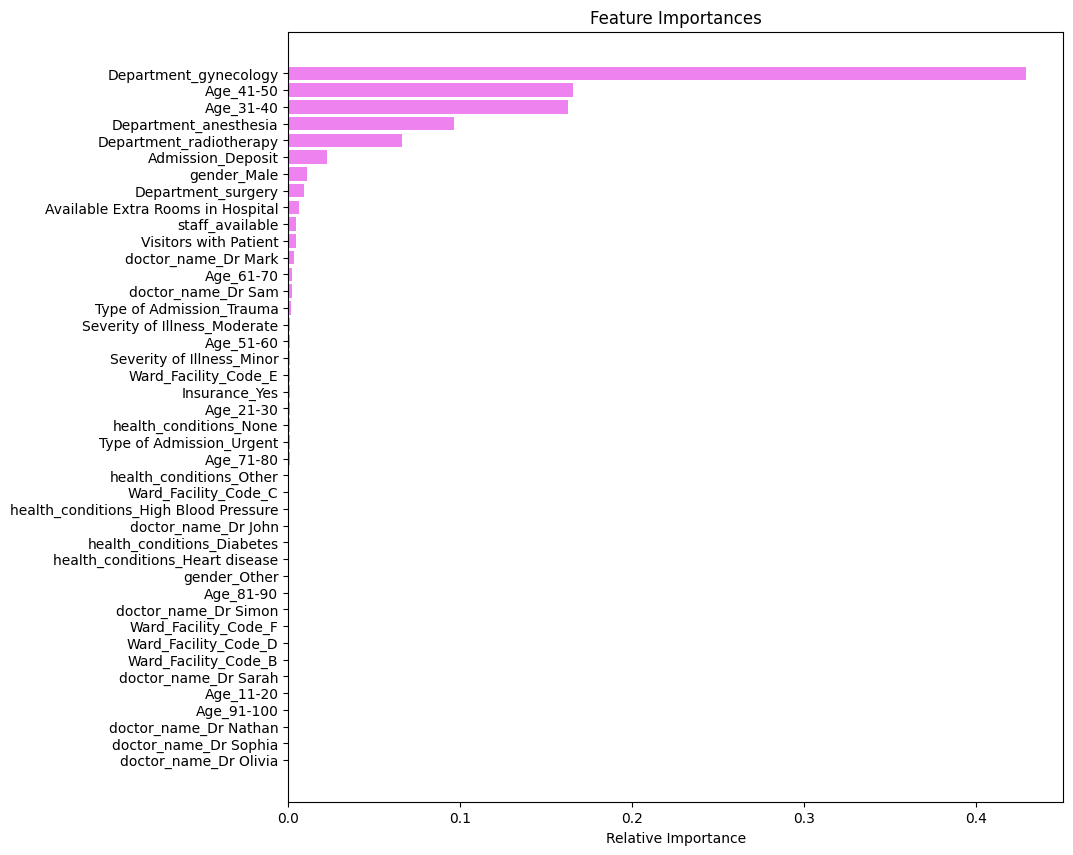

In [ ]:
# Plotting the feature importance
features = list(x.columns)

importances = rf_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- **The most important features** are Department_gynecology, Age_41_50, and Age_31_40, followed by Department_anesthesia, Department_radiotherapy, and Admission_Deposit.
- The rest of the variables have little or no influence on the length of stay in the hospital in this model.

<a id="business-insights-and-recommendations"></a>
## 🔹 **Business Insights and Recommendations**

- Gynecology is the busiest department of the hospital and it handles 68.7% of the total number of patients. It needs ample resources and staff for the smooth functioning of the department.
- The maximum number of visitors can go up to 32 which is very high. A restriction can be imposed on this.
- 74.2% of the patients are female. Thus, resources need to be procured while keeping this figure in mind.
- A large percentage of patients (89.3%) are in trauma or emergency during admission. An increase in ambulances and emergency rooms can reduce the risk of casualties.
- Ward A has the most number of patients who stay for the longest and the most serious patients. These wards can be equipped with more resources and staff to reduce the length of stay of these patients.
- Elderly patients (51-100) and children (1-10) stay for the longest. Extra attention to these age groups can lead to a faster discharge from the hospital.
- Wards D, E, and C have the most visitors with a patient. These wards will need more space and amenities like washrooms, shops, and lobbies for the visitors. Spaces can also be rented out to shop owners and advertisements to generate extra income.
- Finally, the Random Forest Regressor can predict the length of stay of the patient with just an error of 1 day. The hospital can use these predictions to allocate the resources and staff accordingly and reduce any kind of wastage. The hospital can also allocate the wards and doctors accordingly to optimize admissions even during emergencies.

<a id="next-steps"></a>
## 🔹 **Next Steps**

- The next step is creating a pipeline that includes a Column Transformer to preprocess the data and a model that has been trained on the data.  This pipeline can be used in future applications or as a starting point for further model development.

- Using a pipeline with a Column Transformer is a common practice in machine learning to ensure that data preprocessing is consistent and can be easily reproduced. The pipeline will take care of data preprocessing and model training in a single step, making it easy to use the model in other applications.

- Saving the trained model in the Pickle format allows for easy serialization and deserialization of the model, making it possible to use the model in other applications without needing to retrain it. This is particularly useful when working with large datasets or models that take a long time to train.